# QC Linealidad  radionuclide (Dose) calibrator in NM

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

#data = pd.read_csv('testlinealidad.txt', delim_whitespace =True)
################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET con fuente Cs-137
data = pd.read_csv('linealidadpetmn19.txt', delim_whitespace =True)
###Activimetro 55tR con fuente Co-57
#data = pd.read_csv('linealidadtr2019.txt', delim_whitespace =True)




#para ver los primeros datos
data.head()

,Tiempo,ActividadM,ActividadCal
0,0,18.44,18.44
1,28,15.49,15.45
2,56,12.97,12.95
3,84,10.81,10.85
4,137,7.80,7.76


In [90]:
#(1-(norm.cdf(3)-norm.cdf(-3)))*100

In [91]:
perce=(-(data['ActividadCal']-data['ActividadM'])*100)/data['ActividadCal']
data['percent']=perce

In [92]:
data.describe()
#data.dtypes

,Tiempo,ActividadM,ActividadCal,percent
count,16.000000,16.000000,16.000000,16.000000
mean,258.750000,5.928750,5.923125,0.239158
std,172.893609,5.660678,5.657885,0.459985
min,0.000000,0.730000,0.720000,-0.368664
25%,123.750000,1.330000,1.320000,-0.000000
50%,244.000000,3.960000,3.965000,-0.000000
75%,418.250000,8.552500,8.532500,0.529455
max,514.000000,18.440000,18.440000,1.388889


In [93]:
max(np.absolute(data['percent']))

1.3888888888888902

In [94]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
X = data[['ActividadCal']]
Y = data['ActividadM']

In [96]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
# Slope 
bl=lm.coef_
bl

array([ 1.0004884])

In [98]:
# Intercept
al=lm.intercept_
al

0.0027321296218731916

In [99]:
##### de mCi a Bq
mcibq=3.7E7
##### de uCi a Bq
ucibq=3.7E4

### half life  [minutos]
HL= 110
### half life [s]
HLbq= HL*60
### Tau [s]
Taubq= HLbq/np.log(2)

In [100]:
#plt.plot(data['Tiempo'],data['ActividadM'],'ob')
#plt.yscale('log')
1-bl

array([-0.0004884])

In [101]:
data['ActBq']=data['ActividadM']*mcibq
data['ActMBq']=data['ActBq']/1.0E6
data['IncerBq']=np.sqrt(data['ActBq'])
data['RaizMBq']=np.sqrt(data['ActMBq'])
data['ActicalMBq']=(data['ActividadCal']*mcibq)/1.0E6

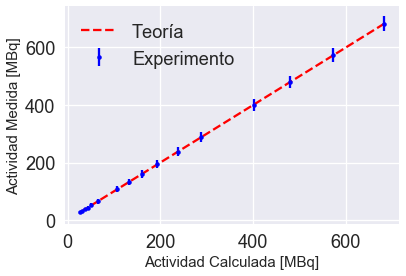

In [102]:
plt.errorbar(data['ActicalMBq'],data['ActMBq'], yerr=data['RaizMBq'],fmt='.b',label='Experimento',capsize=1)
#plt.plot(data['ActividadCal'],data['ActividadM'],'ob',label='Datos')
plt.plot(data['ActicalMBq'],data['ActicalMBq'],'--r',label='Teoría')
plt.xlabel(r'Actividad Calculada [MBq]',size=15)
plt.ylabel(r'Actividad Medida [MBq]',size=15)
plt.legend()

In [103]:
data['LN']=np.log(data['ActMBq'])
#data['LN']=np.log(data['Cuentas'])
#data['LN']=np.log(data['actividad'])

In [105]:
Aexp=(18.44)*np.exp(-((data['Tiempo']*np.log(2))/(110)))
#np.round(Aexp,2)

## Notas de Clase -Física Experimental II - Capítulo 6

Función a ajustar: 

$$A(t) = A_o e^{-t/\tau}$$

que se puede linealizar tomando el logaritmo natural a ambos lados: 

$$\text{ln} \;A(t) =\text{ln}\; A_o-\frac{t}{\tau}$$

tal que:

$$
\begin{align}
f(t) = \text{ln}\;A(t)\\
a=\text{ln}\; A_o\\
b=-\frac{1}{\tau}
\end{align}
$$


### Ajuste por el metodo de mínimos cuadrados 

$$
\begin{align}
y(t) = \text{ln}\;A(t)\\
\sigma_y^2=\left[\frac{dy}{dA}\right]^2\sigma_A^2\\
\sigma_y^2=\frac{1}{A^2} (\sqrt{A})^2=\frac{1}{A}
\end{align}
$$

#### Pesos    $w = 1/\sigma^2$

In [106]:
w= data['ActMBq']
#w= data['Cuentas']
#w= data['ActividadM']

In [107]:
S=sum(w)


$$
\begin{align}
S= \sum \frac{1}{\sigma_i^2}  \; \; \; S_x= \sum \frac{x_i}{\sigma_i^2}\; \; \; S_y= \sum \frac{y_i}{\sigma_i^2}\\
 S_{xx}= \sum \frac{x_i^2}{\sigma_i^2}\; \; \; S_{xy}= \sum \frac{x_iy_i}{\sigma_i^2}
\end{align}
$$

In [108]:
x=data['Tiempo']*w

In [109]:
Sx=sum(x)

In [110]:
xx=((data['Tiempo'])**2)*w

In [111]:
Sxx=sum(xx)

In [112]:
y=data['LN']*w

In [113]:
Sy=sum(y)

In [114]:
xy=(data['Tiempo']*data['LN'])*w

In [115]:
Sxy=sum(xy)

$$
\begin{align}
f(t)= a+bt\\
a=\frac{1}{\Delta}(S_{xx}S_{y}-S_xS_{xy})\\
b=\frac{1}{\Delta}(SS_{xy}-S_xS_y)\\
\Delta= SS_{xx}-(S_x)^2
\end{align}
$$


In [116]:
### Calculando Delta 
det=(S*Sxx)-(Sx)**2

### Ajuste con pesos de a y b 

In [117]:
a=((Sxx*Sy)-(Sx*Sxy))/det
a

6.5254979628740859

In [118]:
b=((S*Sxy)-(Sx*Sy))/det
b

-0.0063065135582979388

#### Incertidumbres

$$
\begin{align}
\text{error a}=\sqrt{\frac{S_{xx}}{\Delta}}\\
\text{error b}=\sqrt{\frac{S}{\Delta}}\\
\end{align}
$$

In [119]:
# incertidumbre acm
inca= np.sqrt(Sxx/det)
# incertidumbre bcm
incb=np.sqrt(S/det)

In [120]:
#inca

### Calculo de Vida media  $\tau$ y $N_o$

$$
\begin{align}
\tau=-\frac{1}{b}\\
e^a= N_o
\end{align}
$$

In [121]:
### Vida Media 
tau=-1/b
tau

158.56621741250794

In [122]:
### Cuentas
cuen=np.exp(a)
cuen

682.31945882713501

In [123]:
###Actividad en MBq
#A=(cuen)*np.exp(-(data['Tiempo']/tau))/1.0E6
#N=(cuen)*np.exp(-(data['Tiempo']/tau))
A=(cuen)*np.exp(-(data['Tiempo']/tau))

#### Incertidumbres  vida media y cuentas 

$$
\begin{align}
\sigma^2 (a)=\left[\frac{da}{dN_o}\right]^2\sigma^2 (N_o) \; \; \; \; \sigma (N_o)= N_o \sigma (a)\\
\sigma^2 (\tau)=\left[\frac{d\tau}{db}\right]^2\sigma^2 (b) \; \; \; \; \sigma (\tau)=\frac{1}{b^2} \sigma (b)
\end{align}
$$

In [124]:
inccuen= cuen*inca
inccuen

15.894456695332845

In [125]:
inctau=incb/(b**2)
inctau

3.4770412281929288

In [126]:
#data['incerti']=data['actividad']*0.0182
#data['incerti']=np.sqrt(data['Cuentas'])
data.tail()

,Tiempo,ActividadM,ActividadCal,percent,ActBq,ActMBq,IncerBq,RaizMBq,ActicalMBq,LN
11,412,1.38,1.37,0.729927,51060000.0,51.06,7145.628034,7.145628,50.69,3.933001
12,437,1.18,1.17,0.854701,43660000.0,43.66,6607.571415,6.607571,43.29,3.776432
13,462,1.00,1.00,-0.000000,37000000.0,37.00,6082.762530,6.082763,37.00,3.610918
14,489,0.84,0.84,-0.000000,31080000.0,31.08,5574.943946,5.574944,31.08,3.436565
15,514,0.73,0.72,1.388889,27010000.0,27.01,5197.114584,5.197115,26.64,3.296207


In [127]:
# import the visualization package: seaborn
import seaborn as sns
sns.set_context("talk",font_scale=1.4)

###  Visualización 

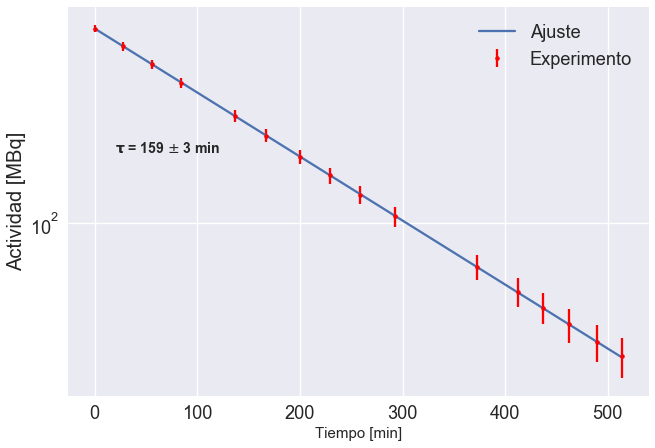

In [135]:
#plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['IncerMBq'],fmt='.r',label='Experimento',capsize=1)
plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['RaizMBq'],fmt='.r',label='Experimento',capsize=1)
#plt.errorbar(data['Tiempo'],data['Cuentas'], yerr=data['incerti'],fmt='.r',label='Experimento',capsize=1)
#plt.errorbar(data['Tiempo'],data['actividad'], yerr=data['Raizmci'],fmt='.r',label='Experimento',capsize=1)
#plt.plot(data['Tiempo'],N,label='ajuste')
plt.plot(data['Tiempo'],A,label='Ajuste')
#plt.plot(data['Tiempo'],data['ActicalMBq'],label='Calculada')
plt.xlabel(r'Tiempo [min]',size=15)
plt.ylabel(r'Actividad [MBq]',size=20)
#plt.ylabel(r'Actividad [mCi]',size=20)

tx=r'$\mathbf{{\tau}}$ = {:.0f} $\pm$ {:.0f} min'
plt.annotate(tx.format(tau,inctau),xy=(20, 200), fontsize=14, fontweight="bold")
plt.legend()
#plt.ylim(1E-20,1E2)
plt.yscale('log')
#plt.savefig('lineali25petmn.pdf')

In [131]:
Periodosemi=(tau*np.log(2))
Periodosemi

109.90972653153518

In [132]:
semividainc=(inctau*np.log(2))
semividainc

2.4101013240126181

In [134]:
### Tc 99m Activimetro 55 tR-MN 
#período semidesintegración 6.01 h 
#((np.round(Periodosemi,2)-6.01)*100)/6.01
### F -18 Activimetro 25 PET-MN
((np.round(Periodosemi,2)-109.7)*100)/109.7

0.19143117593436074

### Discrepancia

$$ Discrepancia=x_{best}-x_{accepted} $$
$$ t=\frac{|x_{best}-x_{accepted}|}{\sigma}$$

In [58]:
### Tc 99m Activimetro 55 tR-MN 
#período semidesintegración 6.01 h 
discre=np.round(Periodosemi,2)-6.01

In [59]:
discre<semividainc

True

si discre < semividainc, discrepancia no es significativa. Medición satisfactoria 

In [63]:
#t=(np.absolute(np.round(Periodosemi,2)-6.01))/semividainc

In [64]:
#(1-(norm.cdf(t)-norm.cdf(t)))*100

100.0

In [66]:
#### Sobreestimación porcentaje error
np.round(max(np.absolute(data['percent'])),2)

0.93000000000000005

### Que tan bueno es el ajuste? - Chi cuadrado

In [184]:
#data['LN']
#((data['LN']-(a+(b*data['Tiempo'])))/data['incerti'])**2

In [67]:
#chicuadrado= sum(((data['Cuentas']-np.round(cuen*np.exp(b*data['Tiempo']),0))/data['incerti'])**2)
#chicuadrado= sum(((data['ActMBq']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['RaizMBq'])**2)
#chicuadrado= sum(((data['actividad']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['Raizmci'])**2)
#chicuadrado

In [68]:
#sum(((data['actividad']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['Raizmci'])**2)
#sum(((data['ActMBq']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['RaizMBq'])**2)

In [69]:
### Número de grados de libertad= Número de puntos independientes a ajustar - Número de parámetros por hallar (2 línea Recta)
#libertad= len(data['Tiempo'])-2
#libertad

In [70]:
###Chi cuadrado reducido
#chicuadrado/libertad

### Distribución acumulativa Chi-cuadrado

en una terminal ejecute el programa maxima
y escriba: 



gamma_incomplete_regularized(chicuadrado/2,libertad/2);

Nivel de confianza convencional en Física= CL = 0.05

